In [1]:
import pandas as pd
import os
from pyFTS.common import Util as cUtil
from pyFTS.benchmarks import Measures
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics import tsaplots as tsp
from statsmodels.tsa.seasonal import seasonal_decompose
from pyFTS.benchmarks import ResidualAnalysis, Measures
from scipy.special import boxcox, inv_boxcox

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.chdir("/Users/cseveriano/spatio-temporal-forecasting/")

fln_df = pd.read_csv('data/processed/SONDA/FLN-15min.csv', sep=";", parse_dates=['date'], index_col='date')

joi_df = pd.read_csv('data/processed/SONDA/JOI-15min.csv', sep=";", parse_dates=['date'], index_col='date')

sbr_df = pd.read_csv('data/processed/SONDA/SBR-15min.csv', sep=";", parse_dates=['date'], index_col='date')

In [16]:
# Colocando todas as bases no mesmo intervalo

fln_df = fln_df[(fln_df.index >= '2013-11-01') & (fln_df.index <= '2015-10-31')]
joi_df = joi_df[(joi_df.index >= '2013-11-01') & (joi_df.index <= '2015-10-31')]
sbr_df = sbr_df[(sbr_df.index >= '2013-11-01') & (sbr_df.index <= '2015-10-31')]


In [68]:
# Removendo linhas em que o dia possui falhas de mediçao
#df = pd.DataFrame(data = {'fln': fln_df.glo_avg, 'sbr': sbr_df.glo_avg, 'joi': joi_df.glo_avg},
#    index=fln_df.index)
#df[df.isnull().any(axis=1)].index.date
null_dates = df[df.isnull().any(axis=1)].index
str_null_dates = []

for nd in null_dates:
    str_null_dates.append("{:%d/%m/%Y}".format(nd))
new_df = df.copy()
for index, row in df.iterrows():
    strdate = "{:%d/%m/%Y}".format(index)
    if strdate in null_dates:
        #print("Removing: ",index)
        new_df.drop(index, inplace=True)
        
new_df[new_df.isnull().any(axis=1)]
#df.isnull().any(axis=1).index.date
#df.index.date

Removing:  2013-11-11 00:00:00
Removing:  2013-11-11 00:15:00
Removing:  2013-11-11 00:30:00
Removing:  2013-11-11 00:45:00
Removing:  2013-11-11 01:00:00
Removing:  2013-11-11 01:15:00
Removing:  2013-11-11 01:30:00
Removing:  2013-11-11 01:45:00
Removing:  2013-11-11 02:00:00
Removing:  2013-11-11 02:15:00
Removing:  2013-11-11 02:30:00
Removing:  2013-11-11 02:45:00
Removing:  2013-11-11 03:00:00
Removing:  2013-11-11 03:15:00
Removing:  2013-11-11 03:30:00
Removing:  2013-11-11 03:45:00
Removing:  2013-11-11 04:00:00
Removing:  2013-11-11 04:15:00
Removing:  2013-11-11 04:30:00
Removing:  2013-11-11 04:45:00
Removing:  2013-11-11 05:00:00
Removing:  2013-11-11 05:15:00
Removing:  2013-11-11 05:30:00
Removing:  2013-11-11 05:45:00
Removing:  2013-11-11 06:00:00
Removing:  2013-11-11 06:15:00
Removing:  2013-11-11 06:30:00
Removing:  2013-11-11 06:45:00
Removing:  2013-11-11 07:00:00
Removing:  2013-11-11 07:15:00
Removing:  2013-11-11 07:30:00
Removing:  2013-11-11 07:45:00
Removing

,fln,joi,sbr
date,,,
2013-11-03 11:00:00,110.173333,212.340000,NaN
2013-11-03 11:15:00,105.845333,329.613333,NaN
2013-11-03 11:30:00,128.846667,286.820000,NaN
2013-11-03 11:45:00,148.655333,303.973333,NaN
2013-11-03 12:00:00,113.306667,314.506667,NaN
2013-11-03 12:15:00,121.260000,302.246667,NaN
2013-11-03 12:30:00,123.173333,571.913333,NaN
2013-12-02 06:00:00,-0.598600,-0.332667,NaN
2013-12-02 06:15:00,-0.691200,-0.592467,NaN


In [72]:
fln_test = df[:35040].fln

#new_df.info()

In [83]:
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange

def plotSpectrum(y,Fs):
    n = len(y) # length of the signal
    k = arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
 
    plot(frq,abs(Y),'r') # plotting the spectrum
    xlabel('Freq (Hz)')
    ylabel('|Y(freq)|')

365.0

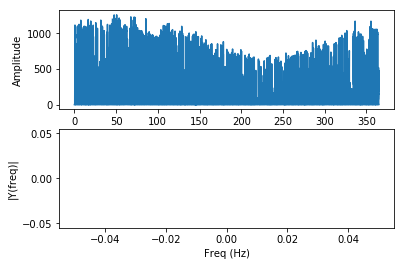

In [84]:
Fs = 96;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = arange(0,365,Ts) # time vector

ff = 5;   # frequency of the signal
y = fln_test

subplot(2,1,1)
plot(t,y)
xlabel('Time(Days)')
ylabel('Amplitude')
subplot(2,1,2)
plotSpectrum(y,Fs)
show()

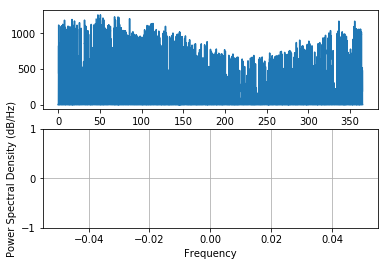

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

Fs = 96;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = arange(0,365,Ts) # time vector

plt.subplot(211)
plt.plot(t, fln_test)
plt.subplot(212)
plt.psd(fln_test, 96, Fs)

plt.show()

In [74]:
#sbr_df.columns[sbr_df.isnull().any()]
#null_columns=sbr_df.columns[sbr_df.isnull().any()]
#train[null_columns].isnull().sum()

#joi_df[joi_df['glo_avg'].isnull()].index


sbr_df.info()
fln_df.info()
joi_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69985 entries, 2013-11-01 00:00:00 to 2015-10-31 00:00:00
Data columns (total 10 columns):
glo_avg     65461 non-null float64
dir_avg     65460 non-null float64
diff_avg    65460 non-null float64
lw_avg      65460 non-null float64
tp_sfc      65460 non-null float64
humid       65460 non-null float64
press       65439 non-null float64
rain        65460 non-null float64
ws_10m      0 non-null float64
wd_10m      0 non-null float64
dtypes: float64(10)
memory usage: 5.9 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69985 entries, 2013-11-01 00:00:00 to 2015-10-31 00:00:00
Data columns (total 10 columns):
glo_avg     69931 non-null float64
dir_avg     69931 non-null float64
diff_avg    69931 non-null float64
lw_avg      69931 non-null float64
tp_sfc      69931 non-null float64
humid       69931 non-null float64
press       69931 non-null float64
rain        69931 non-null float64
ws_10m      68742 non-null float64
wd_10m      68